## Gravitational Waves Data Preprocessing 


In [1]:
#Requiered libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
from gwpy.frequencyseries import FrequencySeries

In [49]:
#Function Purpose to Load Data given a path
def loadData(path):
    data = np.load(path) 
    return data

In [44]:
#Function Purpose to return a labeled Data Frame of the Gravitational waves Time Series Data Frame
def createTSDataFrame(sample_data):
    labels = ['LIGO Hanford', 'LIGO Livingston', 'Virgo' ]
    df = pd.DataFrame(sample_data)
    df.index = labels
    return df 

In [45]:
#Function Purpose to return each time series object represented in the npy array, give Time Series Data
def read_ts_file(Time_Series_Data): 
    ts1 = TimeSeries(Time_Series_Data[0,:], sample_rate =2048)
    ts2 = TimeSeries(Time_Series_Data[1,:],sample_rate =2048)
    ts3 = TimeSeries(Time_Series_Data[2,:],sample_rate =2048)
    return  ts1, ts2, ts3

In [46]:
#Function to plot all 3 Time series individually
def plot_data(d1, d2, d3):
    plot = Plot(d1, d2, d3, separate=True, sharex=True, figsize=[12, 6])
    ax = plt.gca()   
    ax.set_xlim(0,2)
    ax.set_xlabel('Time [seconds]')
    plot.show()

In [47]:
#Ploting all time series in one plot
def plot_data_jointly(ts1, ts2, ts3):  
    plot = Plot(figsize=(15, 9))
    ax = plot.add_subplot(xscale='auto-gps')
    ax.plot(ts1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
    ax.plot(ts2, color='gwpy:ligo-livingston', label='LIGO-Livingston')
    ax.plot(ts3, color='gwpy:virgo', label='Virgo')
    ax.set_xlim(0, 2)
    ax.set_ylabel('Strain noise')
    ax.set_title("Joint Plot of Time Series")
    ax.legend()
    plot.show()

In [37]:
#Loading sample data from given path
path1_signal = "../../../Group Project/data/train/0/0/0/000a1f352b.npy" #Signal
path_no_signal = "../../../Group Project/data/train/0/0/0/00001f4945.npy" #No Signal

sample_data_signal = loadData(path1_signal)
sample_no_signal = loadData(path_no_signal)

In [38]:
#Storing each timeseries (from each device), for both timeseries with a signal and no signal
ts_signal1,  ts_signal2,  ts_signal3 = read_ts_file(sample_data_signal)
ts_no_signal1,  ts_no_signal2,  ts_no_signal3 = read_ts_file(sample_no_signal)

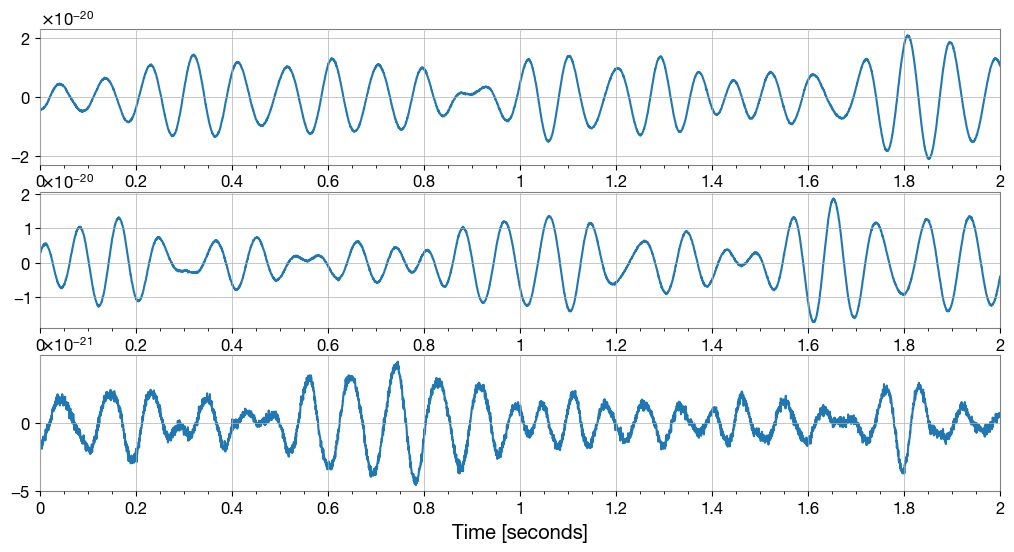

In [39]:
#ploting time Series with signal
plot_data(ts_signal1,  ts_signal2,  ts_signal3)

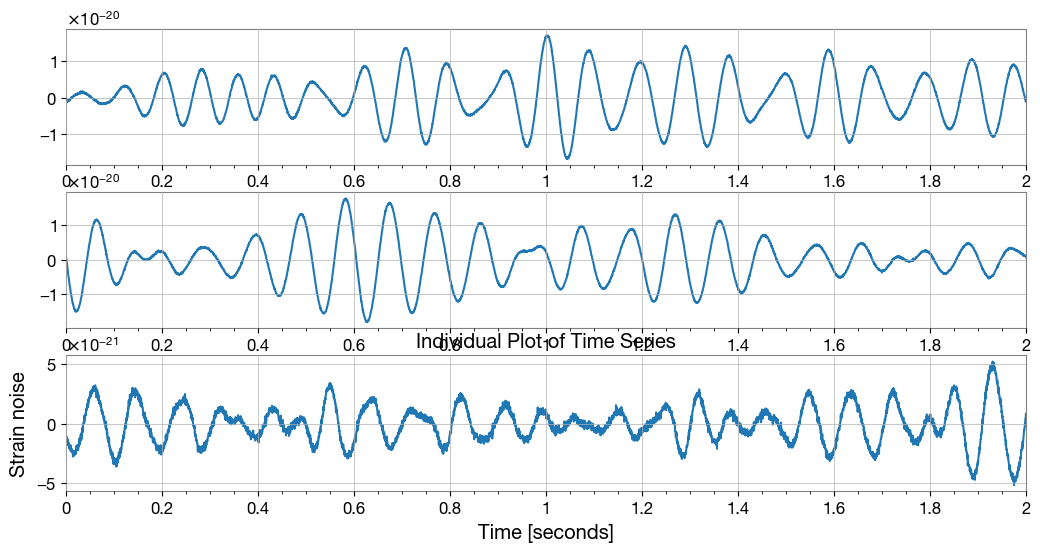

In [32]:
#ploting time Series without a signal
plot_data(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

- <font size = 4> We observe tehre is no visual diffrence, between a timeseris file with or withouth a signal.

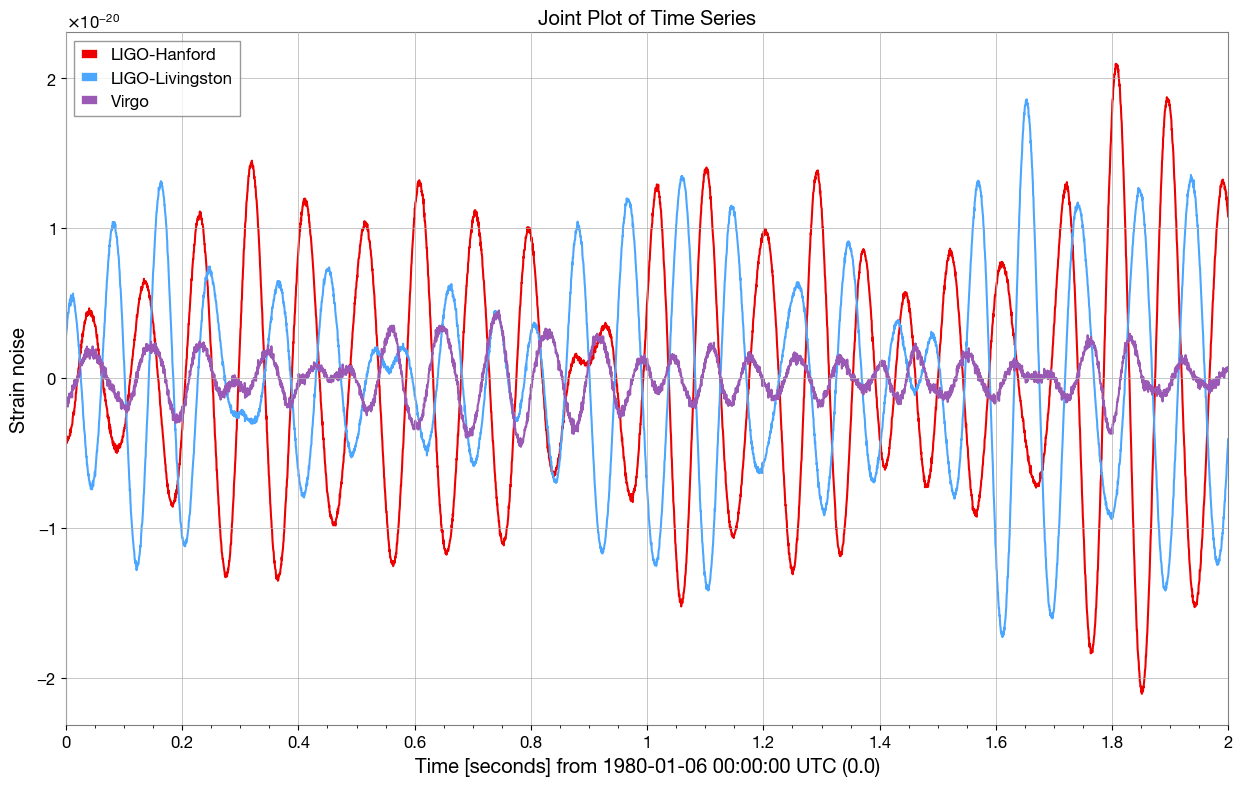

In [41]:
#Joint plot of time series with a signal
plot_data_jointly(ts_signal1,  ts_signal2,  ts_signal3)

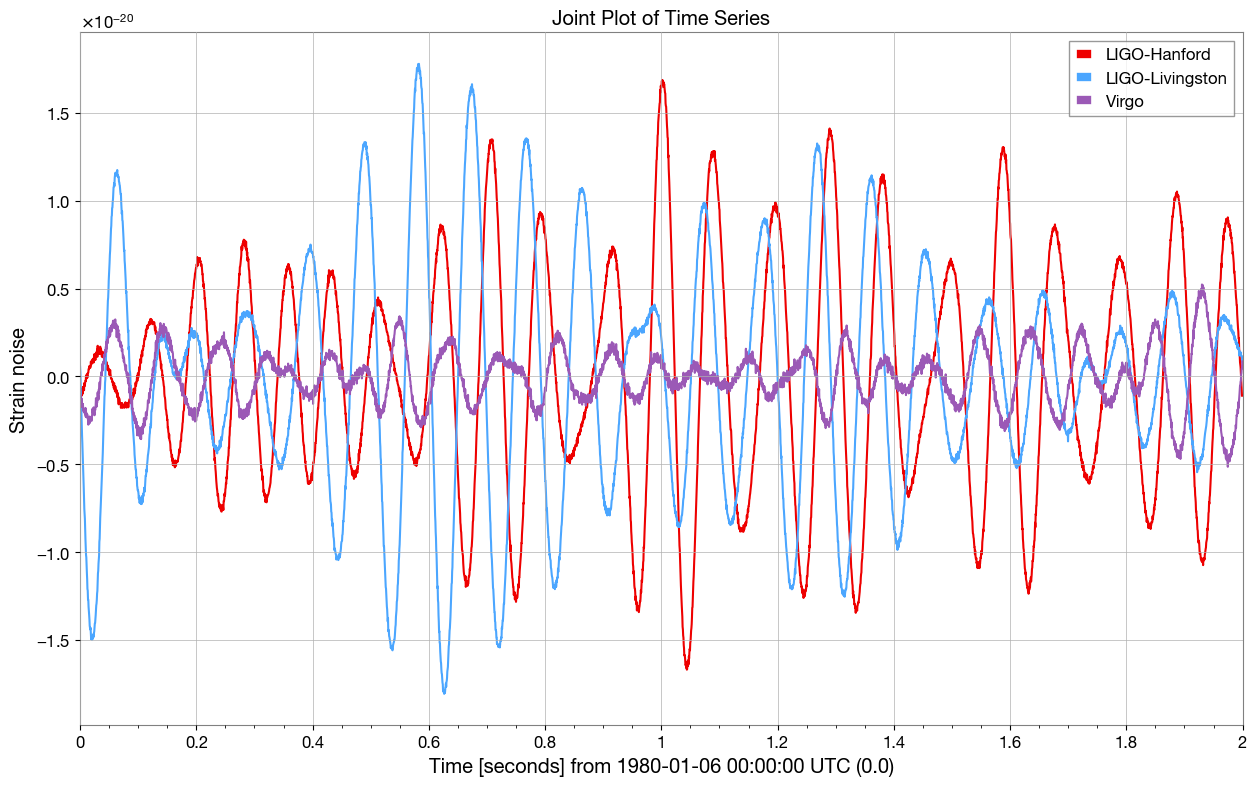

In [43]:
#Joint plot of time series without a signal
plot_data_jointly(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

(0.0, 2.0)

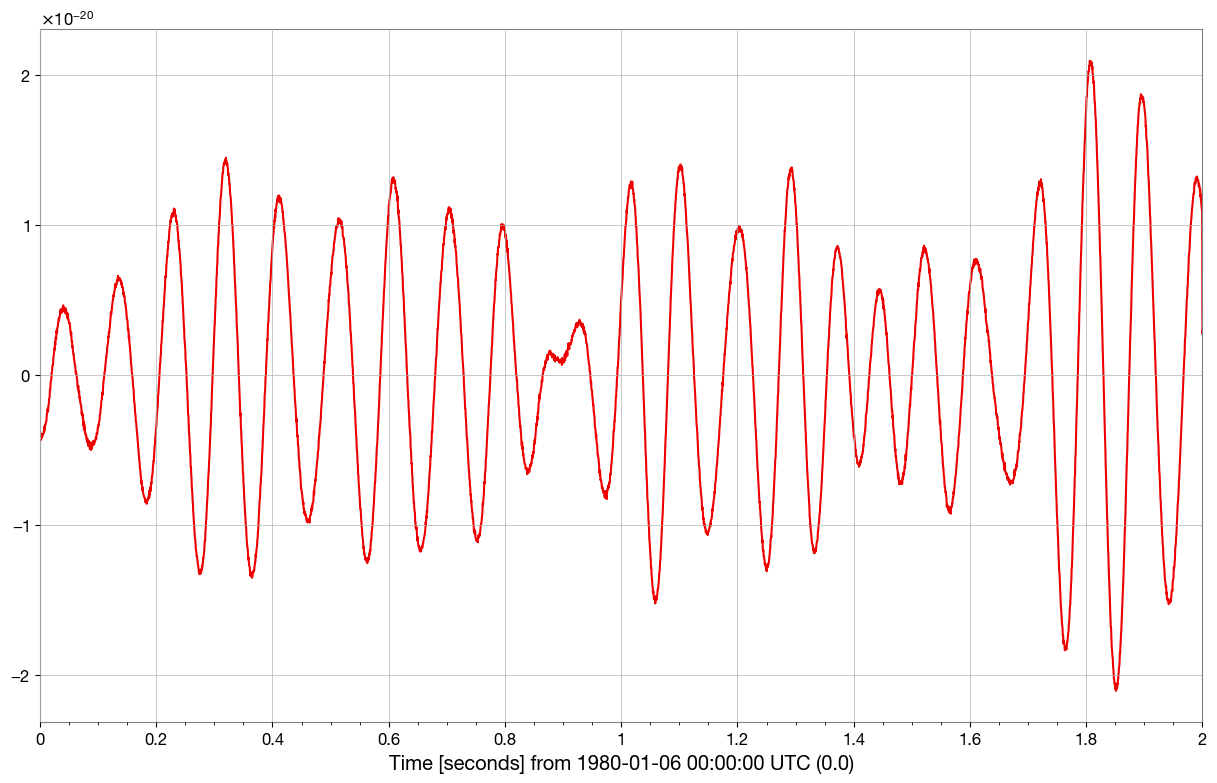

In [64]:
ts1 = TimeSeries(sample_data_signal.flatten(), sample_rate =2048)
plot = Plot(figsize=(15, 9))
ax = plot.add_subplot(xscale='auto-gps')
ax.plot(ts1, color='gwpy:ligo-hanford')
ax.set_xlim(0, 2)

In [72]:
spectrum = ts_signal1.asd(2)

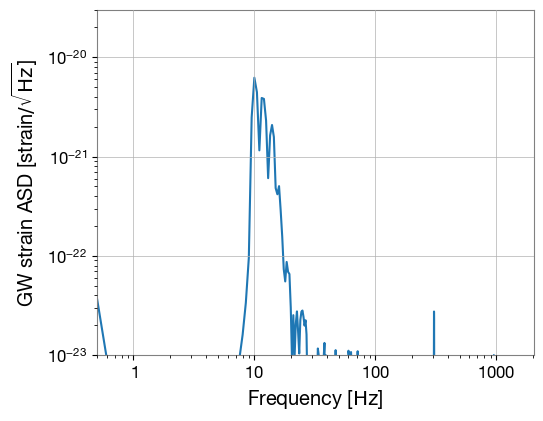

In [73]:
plot = spectrum.plot()
ax = plot.gca()
ax.set_xlim(0, 2048)
ax.set_ylabel(r'GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
ax.set_ylim(1e-23, 3e-20)
plot.show()